# Lowlevel Control

In [2]:
from Go2Py.robot.interface import GO2Real
import time
robot = GO2Real(mode='lowlevel')

pygame 2.5.2 (SDL 2.28.2, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
robot.getJointStates()

{'q': [-0.053992271423339844,
  1.2556536197662354,
  -2.810431957244873,
  0.05044972896575928,
  1.2568042278289795,
  -2.7854413986206055,
  -0.37021589279174805,
  1.2639139890670776,
  -2.7981419563293457,
  0.3528062701225281,
  1.2717256546020508,
  -2.8037500381469727],
 'dq': [-0.011626571416854858,
  -0.03100419044494629,
  0.028308173641562462,
  0.046506285667419434,
  0.027128666639328003,
  -0.04246226325631142,
  -0.03100419044494629,
  0.05038180947303772,
  0.02022012509405613,
  -0.03100419044494629,
  -0.01937761902809143,
  -0.02022012509405613],
 'tau_est': [-0.024738281965255737,
  0.07421484589576721,
  -0.04741504043340683,
  -0.07421484589576721,
  -0.14842969179153442,
  0.04741504043340683,
  -0.024738281965255737,
  0.024738281965255737,
  0.0,
  0.049476563930511475,
  -0.049476563930511475,
  0.0],
 'temperature': [32.0,
  29.0,
  28.0,
  31.0,
  28.0,
  28.0,
  32.0,
  29.0,
  27.0,
  33.0,
  30.0,
  28.0]}

In [4]:
from Go2Py.utils.ros2 import ROS2ExecutorManager, ROS2TFInterface
import rclpy
rclpy.init()    
executor_manager = ROS2ExecutorManager()
vicon_sensor = ROS2TFInterface('vicon/World', 'vicon/GO2/GO2', node_name='vicon_sensor_node')
executor_manager.add_node(vicon_sensor)
executor_manager.start()

In [32]:
vicon_sensor.get_pose()

array([[-0.80060801,  0.58043764,  0.14872442,  0.26726318],
       [-0.58674233, -0.80977164,  0.00182437, -0.42307191],
       [ 0.12149175, -0.08580231,  0.988877  ,  0.3776654 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [48]:
dT = 0.001
duration = 60

qs = []
dqs = []
taus =[]
Ts = []
stamps = []
for i in range(int(duration/dT)):
    stamps.append(time.time())
    state = robot.getJointStates()
    q = state['q']
    dq = state['dq']
    tau = state['tau_est']
    world_T_vicon = vicon_sensor.get_pose()
    qs.append(q)
    dqs.append(dq)
    taus.append(tau)
    Ts.append(world_T_vicon.reshape(1,4,4))
    time.sleep(dT)
qs = np.vstack(qs)
dqs = np.vstack(dqs)
taus = np.vstack(taus)
Ts = np.vstack(Ts)

In [49]:
import pickle
dataset = {
    'q':qs,
    'dq':dqs,
    'tau':taus, 
    'world_T_marker':Ts
}
with open('datasets/walking.pkl', 'wb') as f:
    pickle.dump(dataset, f)
    

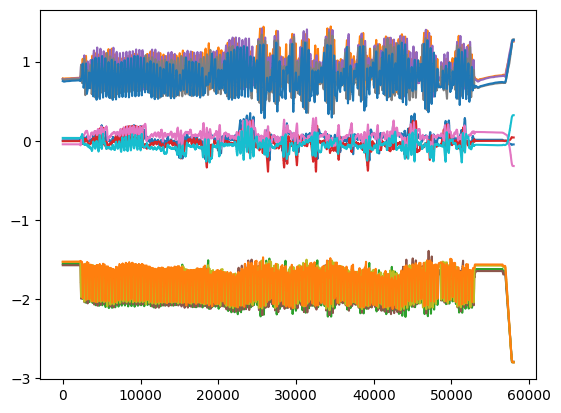

In [50]:
import matplotlib.pyplot as plt
plt.plot(qs[:58000,:])

In [40]:
qs.shape

(60000, 12)